#### Variable description table

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

In [9]:
bg_url='Data/tl_2017_48_bg'
bg=gpd.read_file(bg_url)
bg.geometry=bg.geometry.to_crs('EPSG:2277')

In [10]:
stations=pd.read_excel("Data/FullSUPIdentifiedData.xlsx")

In [11]:
stations1=gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations.Longitude,stations.Latitude), crs='EPSG:4326')
stations1=stations1.to_crs("EPSG:2277")
stations1.geometry=stations1.geometry.buffer(5280)

<Axes: >

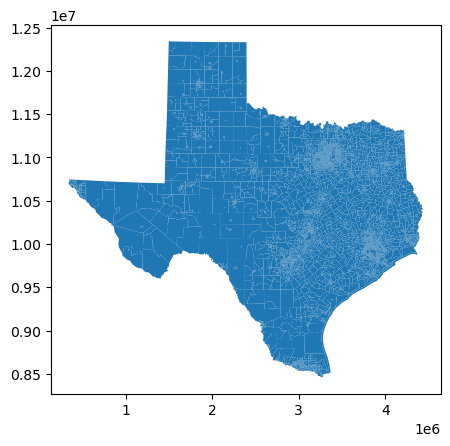

In [12]:
ax=bg.plot()
stations1.plot(ax=ax)

In [13]:
b = gpd.sjoin(bg, stations1, how='inner', op='intersects')
a1=b[['stationid','GEOID','Longitude','Latitude']]
a1.to_csv("Data/Temp/List of block group around count stations.csv", index=False)

<Axes: >

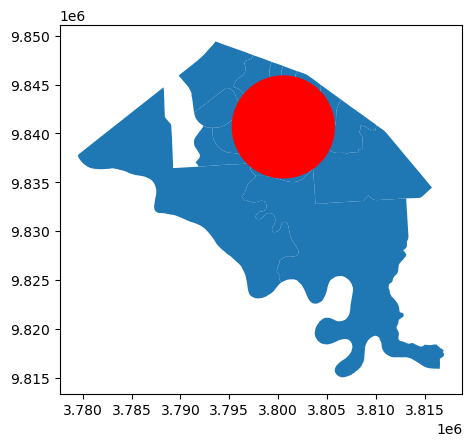

In [14]:
ax=b[b.stationid=='SL0005'].plot()
stations1[stations1.stationid=='SL0005'].plot(ax=ax, color='red')